In [1]:
import numpy as np
import pandas as pd


import torch
from torch import nn
from torch import optim

from collections import Counter
import torch.nn.functional as Fun

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 数据导入

# 用这个导入前面有个none
# dataTrain = np.loadtxt(open('TrainData.csv'), delimiter=",", skiprows=1)
# dataTest = np.loadtxt(open('TestData.csv', 'r'), delimiter=",", skiprows=1)

dataTrain = pd.read_csv('TrainData.csv').to_numpy()
dataTest = pd.read_csv('TestData.csv').to_numpy()

# 分割数据集
X_train, Y_train = dataTrain[:,:4], dataTrain[:,4]
X_test, Y_test = dataTest[:,:4], dataTest[:,4]

# 转化成张量形式
X_train, Y_train = torch.tensor(X_train, dtype=torch.float32), torch.LongTensor(Y_train) 
X_test, Y_test = torch.tensor(X_test, dtype=torch.float32), torch.LongTensor(Y_test) 

In [3]:
# 定义BP神经网络
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()                          # 给父类nn.Module初始化
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 定义隐藏层网络
        self.out = torch.nn.Linear(n_hidden, n_output)       # 定义输出层网络
 
    def forward(self, X):                 # 真正执行数据的流动
        X = Fun.relu(self.hidden(X))      # 隐藏层的激活函数,采用relu,也可以采用sigmod,tanh
        X = self.out(X)                   # 输出层不用激活函数 
        return X

In [4]:
# 训练 and 测试
def Prediction(Net, X_train, Y_train, lr):
    # 定义优化器损失函数
    net = Net 
    optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9) # 优化器选用随机梯度下降方式
    compute_loss = nn.CrossEntropyLoss() # 对于多分类一般采用的交叉熵损失函数,
    
    # 训练数据
    epochs = 500
    for t in range(epochs):
        out = net(X_train)                 # 输入input,输出out
        loss = compute_loss(out, Y_train)     # 输出与label对比
        optimizer.zero_grad()   # 梯度清零
        loss.backward()         # 前馈操作
        optimizer.step()        # 使用梯度优化器

    # 得出结果
    out = net(X_train)  # out是一个计算矩阵，可以用Fun.softmax(out)转化为概率矩阵
    prediction = torch.max(out, 1)[1] # 返回index  0返回原值
    y_pred = prediction.numpy()
    y_true = Y_train.numpy()
    
    # 准确率
    accuracy = float((y_pred == y_true).astype(int).sum()) / float(y_true.size)
    print("莺尾花预测准确率",accuracy)

    c = confusion_matrix(Y_train, y_pred, labels = [0,1,2])
    sns.heatmap(c, annot=True)
    plt.show()

莺尾花预测准确率 0.975


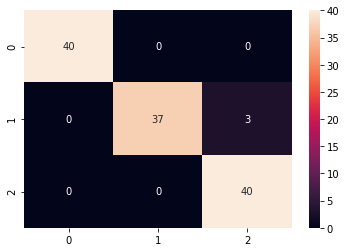

莺尾花预测准确率 1.0


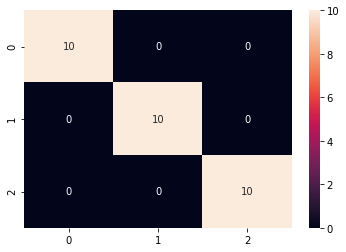

In [5]:
n_feature = 4
n_hidden = 64
n_output = 3
lr = 0.001

Prediction(Net(n_feature, n_hidden, n_output) , X_train, Y_train, lr)
Prediction(Net(n_feature, n_hidden, n_output) , X_test, Y_test, lr)

# 不同隐藏层和隐藏节点的选择：

莺尾花预测准确率 0.9666666666666667


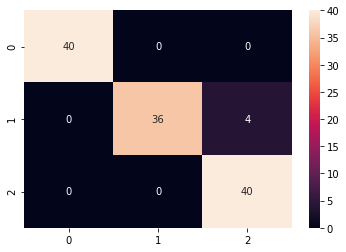

莺尾花预测准确率 1.0


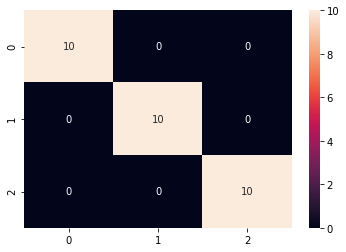

In [6]:
# 不同隐藏层和隐藏节点的选择：
n_feature = 4
n_hidden1 = 100
n_hidden2 = 64
n_output = 3

class Net1(nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net1, self).__init__() # 给父类nn.Module初始化
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # 定义隐藏层网络
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.out = torch.nn.Linear(n_hidden2, n_output)   # 定义输出层网络
 
    def forward(self, X): # 真正执行数据的流动
        X = Fun.relu(self.hidden2(Fun.relu(self.hidden1(X))))     # 隐藏层的激活函数,采用relu,也可以采用sigmod,tanh
        X = self.out(X)                   # 输出层不用激活函数 
        return X


Prediction(Net1(n_feature, n_hidden1, n_hidden2, n_output) , X_train, Y_train, lr)
Prediction(Net1(n_feature, n_hidden1, n_hidden2, n_output) , X_test, Y_test, lr)

莺尾花预测准确率 0.975


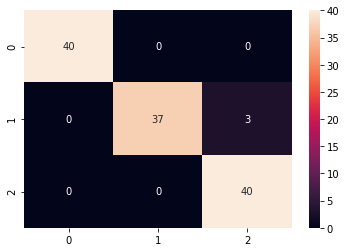

莺尾花预测准确率 1.0


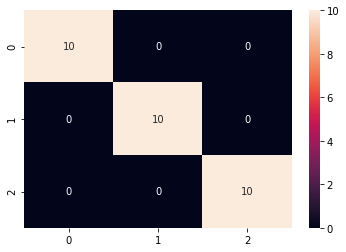

In [7]:
# 不同隐藏层和隐藏节点的选择：
n_feature = 4
n_hidden1 = 256 # 还试了 780和256等 组合，训练集最高达到0.98
n_hidden2 = 144
n_output = 3

class Net1(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net1, self).__init__() # 给父类nn.Module初始化
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # 定义隐藏层网络
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.out = torch.nn.Linear(n_hidden2, n_output)   # 定义输出层网络
 
    def forward(self, X): # 真正执行数据的流动
        X = Fun.relu(self.hidden2(Fun.relu(self.hidden1(X))))     # 隐藏层的激活函数,采用relu,也可以采用sigmod,tanh
        X = self.out(X)                   # 输出层不用激活函数 
        return X


Prediction(Net1(n_feature, n_hidden, n_output) , X_train, Y_train, lr)
Prediction(Net1(n_feature, n_hidden, n_output) , X_test, Y_test, lr)

# 不同的优化算法

In [8]:
# 训练 and 测试
def Prediction1(Net, X_train, Y_train, lr, optim_f):
    # 定义优化器损失函数
    net = Net 
    optimizer = optim_f(net.parameters(), lr=lr) # 优化器选用随机梯度下降方式
    compute_loss = nn.CrossEntropyLoss() # 对于多分类一般采用的交叉熵损失函数,
    
    # 训练数据
    epochs = 500
    for t in range(epochs):
        out = net(X_train)                 # 输入input,输出out
        loss = compute_loss(out, Y_train)     # 输出与label对比
        optimizer.zero_grad()   # 梯度清零
        loss.backward()         # 前馈操作
        optimizer.step()        # 使用梯度优化器

    # 得出结果
    out = net(X_train)  # out是一个计算矩阵，可以用Fun.softmax(out)转化为概率矩阵
    prediction = torch.max(out, 1)[1] # 返回index  0返回原值
    y_pred = prediction.numpy()
    y_true = Y_train.numpy()
    
    # 准确率
    accuracy = float((y_pred == y_true).astype(int).sum()) / float(y_true.size)
    print("莺尾花预测准确率",accuracy)

    c = confusion_matrix(Y_train, y_pred, labels = [0,1,2])
    sns.heatmap(c, annot=True)
    plt.show()

莺尾花预测准确率 0.6916666666666667


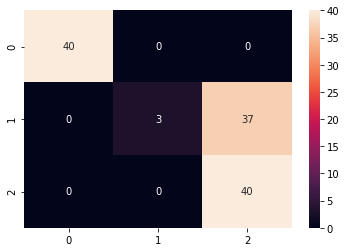

莺尾花预测准确率 0.7333333333333333


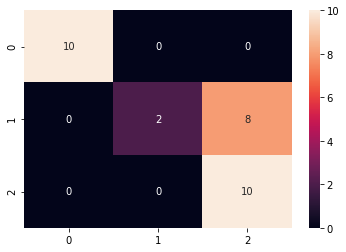

莺尾花预测准确率 0.975


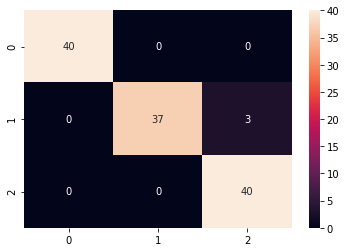

莺尾花预测准确率 1.0


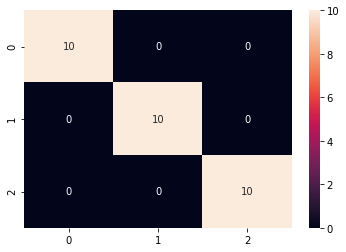

In [9]:
# Adagrad

Prediction1(Net(n_feature, n_hidden, n_output) , X_train, Y_train, lr, optim.Adagrad)
Prediction1(Net(n_feature, n_hidden, n_output) , X_test, Y_test, lr, optim.Adagrad)

lr = 0.01
Prediction1(Net(n_feature, n_hidden, n_output) , X_train, Y_train, lr, optim.Adagrad)
Prediction1(Net(n_feature, n_hidden, n_output) , X_test, Y_test, lr, optim.Adagrad)

# 结论：去掉momentum=0.9 后用原来的lr=0.001准确率还降低了，但改成0.01就好了

莺尾花预测准确率 0.3333333333333333


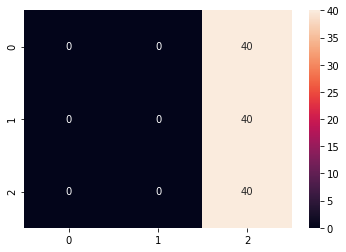

莺尾花预测准确率 0.36666666666666664


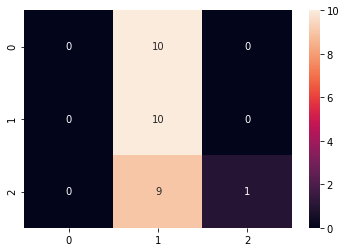

莺尾花预测准确率 0.6916666666666667


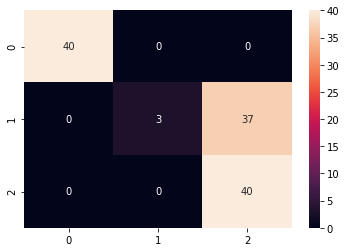

莺尾花预测准确率 0.6666666666666666


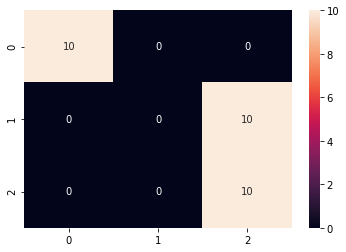

莺尾花预测准确率 0.9833333333333333


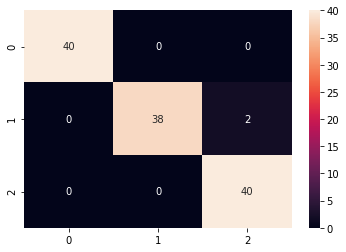

莺尾花预测准确率 1.0


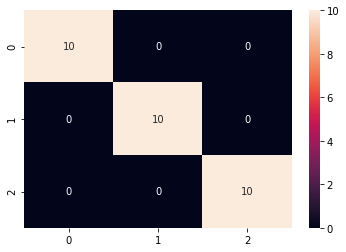

莺尾花预测准确率 0.9333333333333333


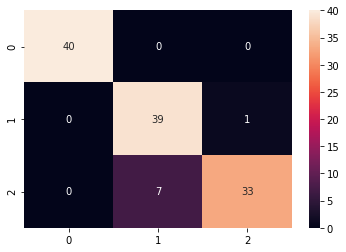

莺尾花预测准确率 1.0


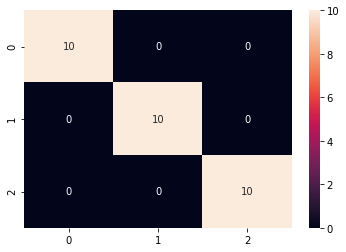

In [10]:
# Adadelta

lr = 0.001
Prediction1(Net(n_feature, n_hidden, n_output) , X_train, Y_train, lr, optim.Adadelta)
Prediction1(Net(n_feature, n_hidden, n_output) , X_test, Y_test, lr, optim.Adadelta)

lr = 0.01
Prediction1(Net(n_feature, n_hidden, n_output) , X_train, Y_train, lr, optim.Adadelta)
Prediction1(Net(n_feature, n_hidden, n_output) , X_test, Y_test, lr, optim.Adadelta)

lr = 0.1 # 合适
Prediction1(Net(n_feature, n_hidden, n_output) , X_train, Y_train, lr, optim.Adadelta)
Prediction1(Net(n_feature, n_hidden, n_output) , X_test, Y_test, lr, optim.Adadelta)

lr = 0.5
Prediction1(Net(n_feature, n_hidden, n_output) , X_train, Y_train, lr, optim.Adadelta)
Prediction1(Net(n_feature, n_hidden, n_output) , X_test, Y_test, lr, optim.Adadelta)

# 结论： 学习域约低效果越差,但学习域过高效果也会变差

# 使用随机梯度下降模型（未完待续